In [143]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd


In [144]:
sales = pd.read_csv("training.csv")

In [145]:
print(sales.head())
print(sales.info())
print(sales.describe())

       ID  store_ID  day_of_week        date  nb_customers_on_day  open  \
0  425390       366            4  2013-04-18                  517     1   
1  291687       394            6  2015-04-11                  694     1   
2  411278       807            4  2013-08-29                  970     1   
3  664714       802            2  2013-05-28                  473     1   
4  540835       726            4  2013-10-10                 1068     1   

   promotion state_holiday  school_holiday  sales  
0          0             0               0   4422  
1          0             0               0   8297  
2          1             0               0   9729  
3          1             0               0   6513  
4          1             0               0  10882  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   

In [146]:
print(sales.shape)
print(sales.columns)
display(sales.dtypes)



(640840, 10)
Index(['ID', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')


ID                      int64
store_ID                int64
day_of_week             int64
date                   object
nb_customers_on_day     int64
open                    int64
promotion               int64
state_holiday          object
school_holiday          int64
sales                   int64
dtype: object

In [147]:
# show unique values in state_holiday column
sales.state_holiday.unique()

# show value counts for state_holiday column
sales['state_holiday'].value_counts()



state_holiday
0    621160
a     12842
b      4214
c      2624
Name: count, dtype: int64

In [148]:
missing_counts = sales.isna().sum() # Calculate missing values per column
print(missing_counts)


ID                     0
store_ID               0
day_of_week            0
date                   0
nb_customers_on_day    0
open                   0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
dtype: int64


In [149]:
corr_matrix = sales.corr(numeric_only=True) # Compute correlation matrix
print(corr_matrix)

                           ID  store_ID  day_of_week  nb_customers_on_day  \
ID                   1.000000 -0.001098    -0.000831            -0.000932   
store_ID            -0.001098  1.000000     0.000329             0.023605   
day_of_week         -0.000831  0.000329     1.000000            -0.385616   
nb_customers_on_day -0.000932  0.023605    -0.385616             1.000000   
open                 0.000083 -0.001108    -0.527947             0.617264   
promotion           -0.001569 -0.000364    -0.392736             0.315858   
school_holiday      -0.000319 -0.000706    -0.206069             0.071085   
sales               -0.000880  0.004804    -0.461107             0.894872   

                         open  promotion  school_holiday     sales  
ID                   0.000083  -0.001569       -0.000319 -0.000880  
store_ID            -0.001108  -0.000364       -0.000706  0.004804  
day_of_week         -0.527947  -0.392736       -0.206069 -0.461107  
nb_customers_on_day  0.617264 

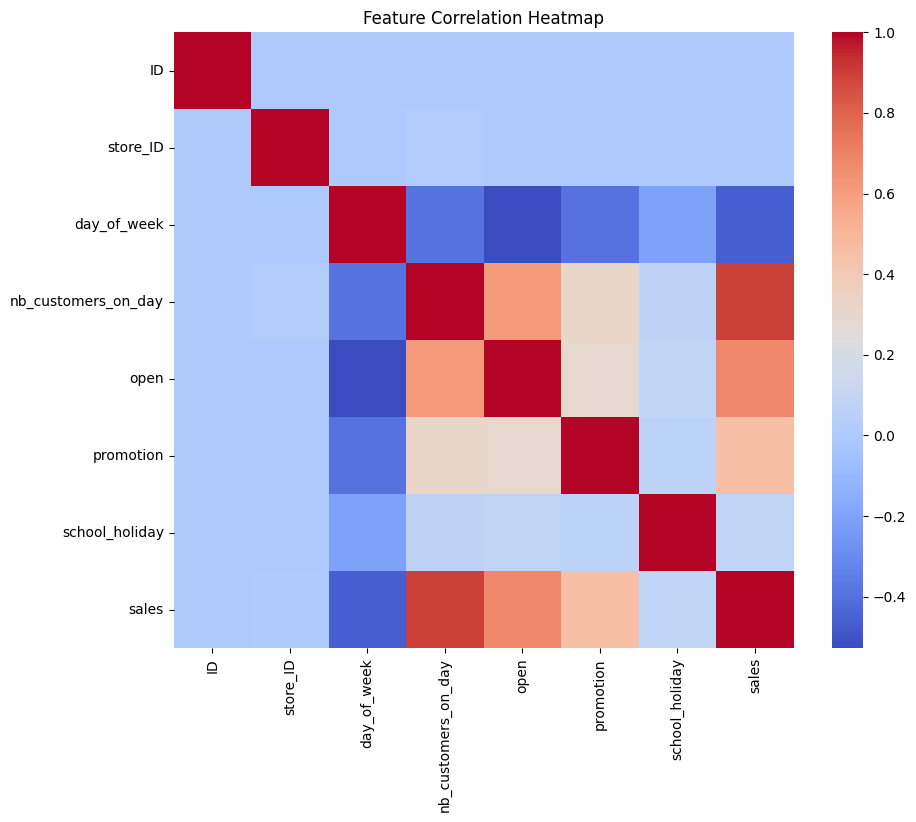

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

In [170]:
high_corr = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # exclude self-correlation
high_corr[high_corr > 0.8].head(10)

sales                nb_customers_on_day    0.894872
nb_customers_on_day  sales                  0.894872
dtype: float64

In [152]:
sales.columns


Index(['ID', 'store_ID', 'day_of_week', 'date', 'nb_customers_on_day', 'open',
       'promotion', 'state_holiday', 'school_holiday', 'sales'],
      dtype='object')

In [165]:
sales_dummy = pd.get_dummies(sales, columns=['state_holiday'], prefix='state_holiday')
print(sales_dummy.head())

       ID  store_ID  day_of_week       date  nb_customers_on_day  open  \
0  425390       366            3 2013-04-18                  517     1   
1  291687       394            5 2015-04-11                  694     1   
2  411278       807            3 2013-08-29                  970     1   
3  664714       802            1 2013-05-28                  473     1   
4  540835       726            3 2013-10-10                 1068     1   

   promotion  school_holiday  sales  year  month  day  week_of_year  quarter  \
0          0               0   4422  2013      4   18            16        2   
1          0               0   8297  2015      4   11            15        2   
2          1               0   9729  2013      8   29            35        3   
3          1               0   6513  2013      5   28            22        2   
4          1               0  10882  2013     10   10            41        4   

   state_holiday_0  state_holiday_a  state_holiday_b  state_holiday_c  
0 

In [166]:
sales_dummy.head()

sales.dtypes.value_counts()


int64             7
int32             5
datetime64[ns]    1
object            1
UInt32            1
Name: count, dtype: int64

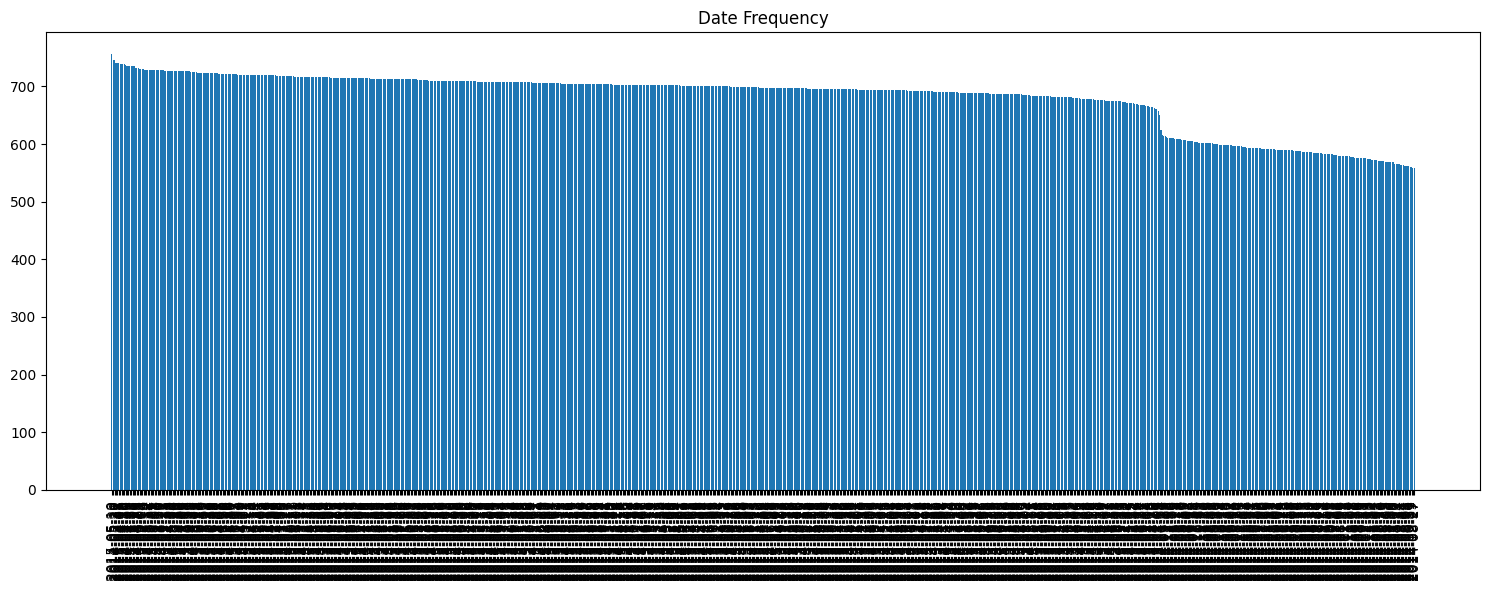

In [155]:
def print_bar_plot(x, y, figsize=(15, 6), title=None):
	plt.figure(figsize=figsize)
	plt.bar(x, y)
	if title:
		plt.title(title)
	plt.xticks(rotation=90)
	plt.tight_layout()
	plt.show()

# create and plot the date frequency using the correct column name 'date'
vc = sales['date'].value_counts()
print_bar_plot(vc.index, vc.values, figsize=(15, 6), title="Date Frequency")



In [156]:
sales['date'] = pd.to_datetime(sales['date'], format='%Y-%m-%d')
sales.date

sales.select_dtypes(include=['object', 'category']).columns

sales['year'] = sales['date'].dt.year
sales['month'] = sales['date'].dt.month
sales['day'] = sales['date'].dt.day
sales['day_of_week'] = sales['date'].dt.dayofweek   # Monday=0, Sunday=6
sales['week_of_year'] = sales['date'].dt.isocalendar().week
sales['quarter'] = sales['date'].dt.quarter





In [167]:
print(sales_dummy.head())

       ID  store_ID  day_of_week       date  nb_customers_on_day  open  \
0  425390       366            3 2013-04-18                  517     1   
1  291687       394            5 2015-04-11                  694     1   
2  411278       807            3 2013-08-29                  970     1   
3  664714       802            1 2013-05-28                  473     1   
4  540835       726            3 2013-10-10                 1068     1   

   promotion  school_holiday  sales  year  month  day  week_of_year  quarter  \
0          0               0   4422  2013      4   18            16        2   
1          0               0   8297  2015      4   11            15        2   
2          1               0   9729  2013      8   29            35        3   
3          1               0   6513  2013      5   28            22        2   
4          1               0  10882  2013     10   10            41        4   

   state_holiday_0  state_holiday_a  state_holiday_b  state_holiday_c  
0 

In [177]:
sales_dummy.drop(columns='date', inplace=True, errors='ignore')
sales_dummy.drop(columns='ID', inplace=True, errors='ignore')

print(sales_dummy.head())

   store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0       366            3                  517     1          0   
1       394            5                  694     1          0   
2       807            3                  970     1          1   
3       802            1                  473     1          1   
4       726            3                 1068     1          1   

   school_holiday  sales  year  month  day  week_of_year  quarter  \
0               0   4422  2013      4   18            16        2   
1               0   8297  2015      4   11            15        2   
2               0   9729  2013      8   29            35        3   
3               0   6513  2013      5   28            22        2   
4               0  10882  2013     10   10            41        4   

   state_holiday_0  state_holiday_a  state_holiday_b  state_holiday_c  
0             True            False            False            False  
1             True            False         

In [171]:
print(sales_dummy.head())


       ID  store_ID  day_of_week  nb_customers_on_day  open  promotion  \
0  425390       366            3                  517     1          0   
1  291687       394            5                  694     1          0   
2  411278       807            3                  970     1          1   
3  664714       802            1                  473     1          1   
4  540835       726            3                 1068     1          1   

   school_holiday  sales  year  month  day  week_of_year  quarter  \
0               0   4422  2013      4   18            16        2   
1               0   8297  2015      4   11            15        2   
2               0   9729  2013      8   29            35        3   
3               0   6513  2013      5   28            22        2   
4               0  10882  2013     10   10            41        4   

   state_holiday_0  state_holiday_a  state_holiday_b  state_holiday_c  
0             True            False            False            Fals

                     store_ID  day_of_week  nb_customers_on_day      open  \
store_ID             1.000000     0.000329             0.023605 -0.001108   
day_of_week          0.000329     1.000000            -0.385616 -0.527947   
nb_customers_on_day  0.023605    -0.385616             1.000000  0.617264   
open                -0.001108    -0.527947             0.617264  1.000000   
promotion           -0.000364    -0.392736             0.315858  0.294936   
school_holiday      -0.000706    -0.206069             0.071085  0.085213   
sales                0.004804    -0.461107             0.894872  0.678463   
year                -0.000175     0.002660            -0.002611 -0.001140   
month                0.000951    -0.005719             0.039516 -0.000102   
day                 -0.000773     0.004800            -0.004695  0.033384   
week_of_year         0.000657    -0.005096             0.042752  0.005301   
quarter              0.000794    -0.008736             0.037234  0.004391   

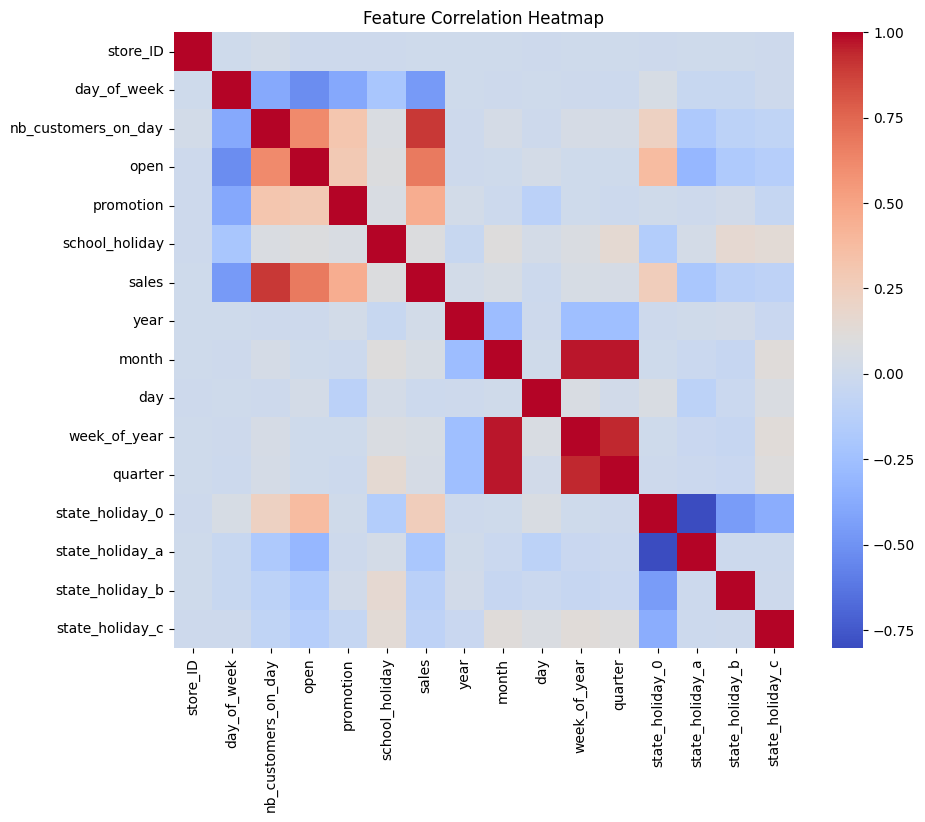

In [178]:
corr_matrix = sales_dummy.corr(numeric_only=True) # Compute correlation matrix
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()



In [179]:
threshold = 0.9

#Select the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation > threshold
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]

#show columns to drop
print("Columns to drop:", to_drop)

# Drop them
sales_dummy.drop(columns=to_drop)

Columns to drop: ['week_of_year', 'quarter']


,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales,year,month,day,state_holiday_0,state_holiday_a,state_holiday_b,state_holiday_c
0,366,3,517,1,0,0,4422,2013,4,18,True,False,False,False
1,394,5,694,1,0,0,8297,2015,4,11,True,False,False,False
2,807,3,970,1,1,0,9729,2013,8,29,True,False,False,False
3,802,1,473,1,1,0,6513,2013,5,28,True,False,False,False
4,726,3,1068,1,1,0,10882,2013,10,10,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640835,409,5,483,1,0,0,4553,2013,10,26,True,False,False,False
640836,97,0,987,1,1,0,12307,2014,4,14,True,False,False,False
640837,987,0,925,1,0,0,6800,2014,7,7,True,False,False,False
640838,1084,3,725,1,0,0,5344,2014,6,12,True,False,False,False


In [181]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split


# Separate predictors (X) and target (y)
X = sales_dummy.drop(columns='sales')  # Replace 'Type' with your actual target column if different
y = sales_dummy['sales']

# Split: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm dimensions
X_train.shape, X_test.shape




((512672, 15), (128168, 15))

In [182]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit scaler only on training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply same transformation to test set
X_test_scaled = scaler.transform(X_test)

# Fit model
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)




,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [188]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lin_reg.predict(X_test_scaled)

print("R² Score:", r2_score(y_test, y_pred))

# compute RMSE manually to avoid using the 'squared' keyword (compatibility with older sklearn)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

print("Coefficients:", lin_reg.coef_)

print("Intercept:", lin_reg.intercept_)

R² Score: 0.8525935746398055
RMSE: 1476.1137682724261
Coefficients: [ -46.36327016 -153.1372547  2810.96284779  560.51446703  626.02940208
   30.06528262  112.55253022  360.48628828    5.21377841    3.08564665
 -260.96054846   66.78852463  -50.9040615   -46.65994981   -9.85025454]
Intercept: 5779.022991308298
